1. Data Preprocessing and EDA

In [28]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

# Step 2: Load Dataset
df = pd.read_csv('Student_Performance.csv')

# Step 3: Display First Few Rows
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


1.2 Check for Missing Values

In [29]:
# Check missing values
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

1.3 Convert Categorical Variables

In [30]:
# Encode 'Extracurricular Activities'
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


1.4 Feature Scaling

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)


      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.775188         1.704176                    1.010455     1.456205   
1         -0.383481         0.723913                   -0.989654    -1.492294   
2          1.161410        -1.063626                    1.010455     0.276805   
3          0.002742        -1.005963                    1.010455    -0.902594   
4          0.775188         0.320275                   -0.989654     0.866505   
...             ...              ...                         ...          ...   
9995      -1.542149        -1.178951                    1.010455    -1.492294   
9996       0.775188        -0.314013                    1.010455     0.866505   
9997       0.388965         0.781575                    1.010455     0.866505   
9998       1.547633         1.588851                    1.010455     0.276805   
9999       0.775188         0.262612                   -0.989654     0.866505   

      Sample Question Paper

1.5 Exploratory Data Analysis (EDA)


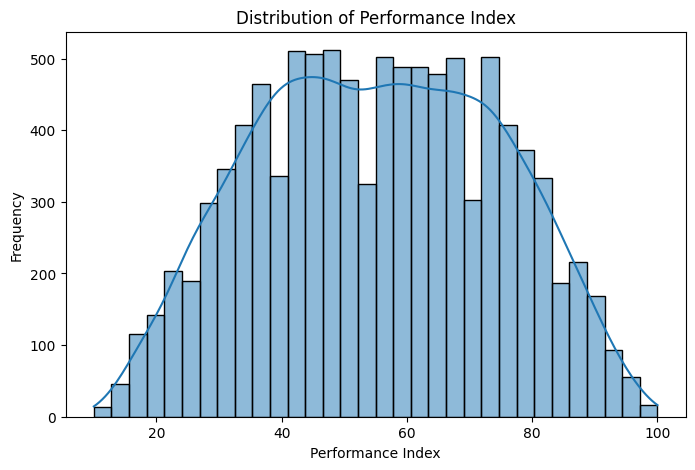

In [32]:
# Distribution of Performance Index
plt.figure(figsize=(8,5))
sns.histplot(df['Performance Index'], kde=True)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()


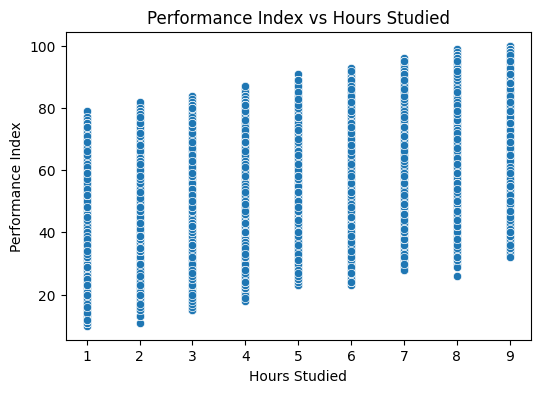

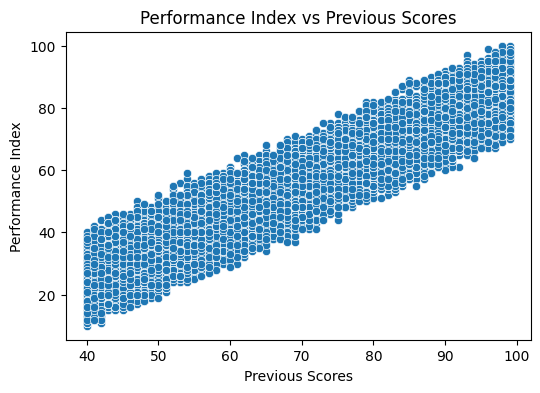

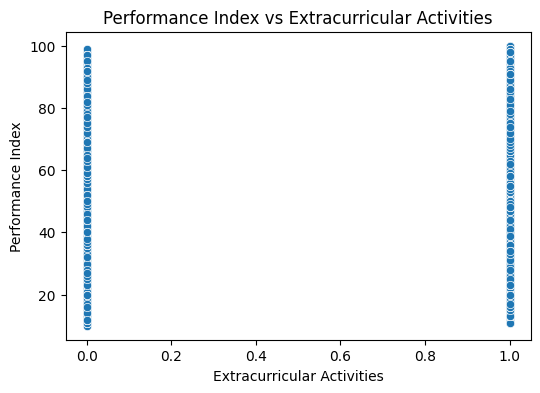

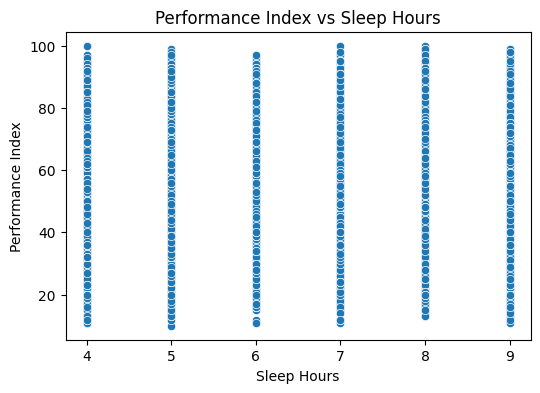

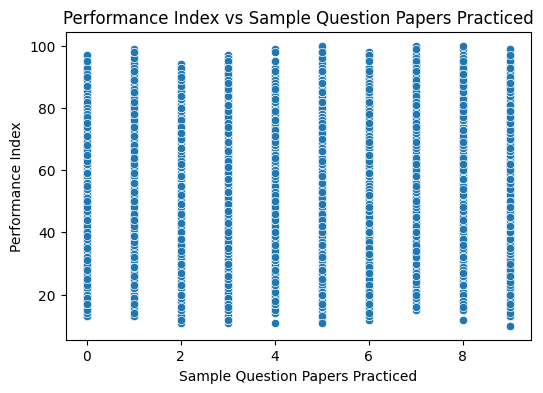

In [46]:
# Scatter Plots for Performance Index vs Various Features

features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

for feature in features:
    plt.figure(figsize=(6,4))  # Set figure size for each plot
    sns.scatterplot(x=df[feature], y=df['Performance Index'])  # Scatter plot for each feature vs Performance Index
    plt.title(f'Performance Index vs {feature}')  # Set plot title
    plt.xlabel(feature)  # Set x-axis label
    plt.ylabel('Performance Index')  # Set y-axis label
    plt.show()  # Display the plot


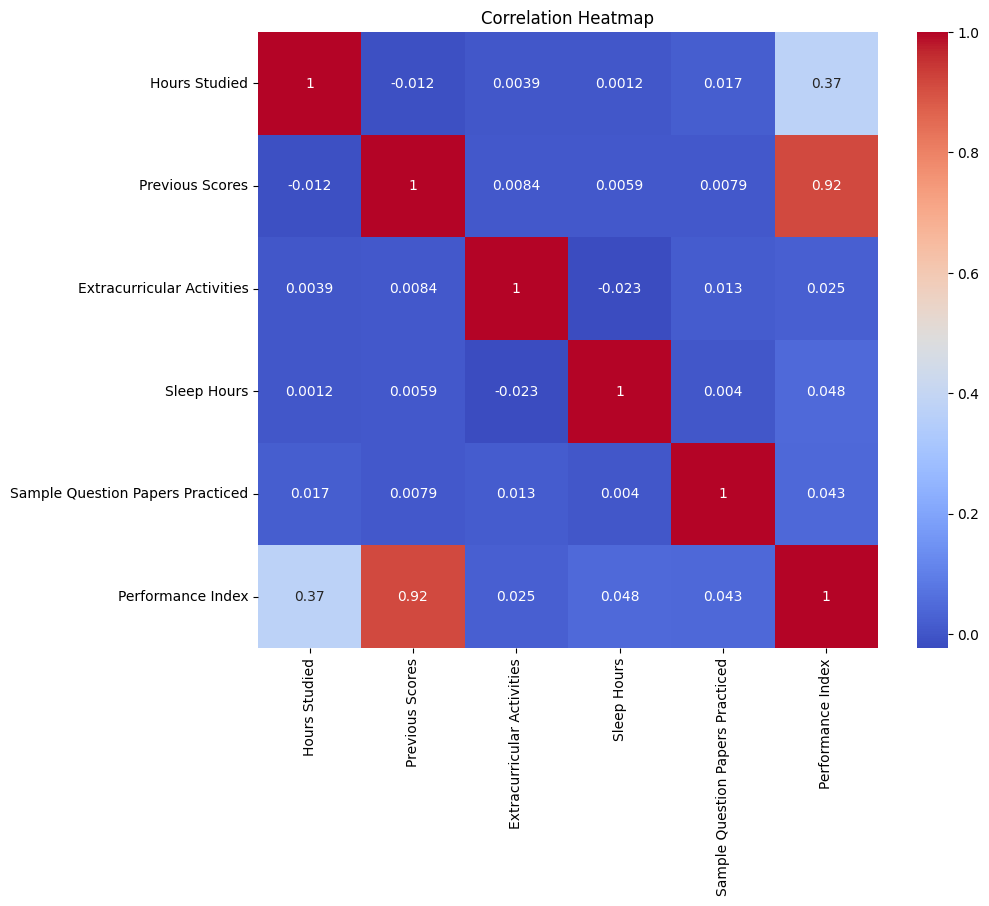

In [34]:
# correlation matix and heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


2. Linear Regression Model Implementation

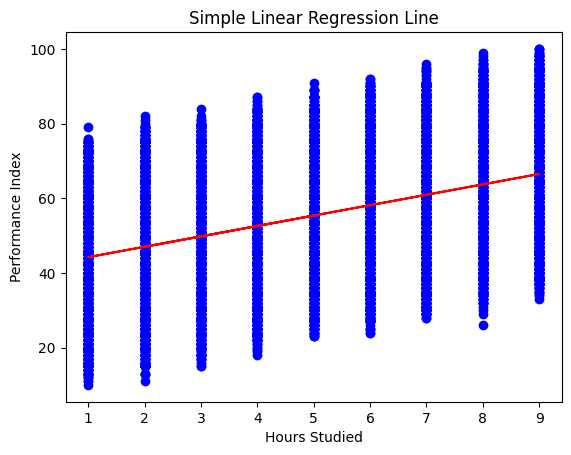

In [35]:
#2.1 Simple Linear Regression (Hours Studied)
X = df[['Hours Studied']]
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# Plot Regression Line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, simple_lr.predict(X_train), color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression Line')
plt.show()


2.2 Multiple Linear Regression (All Features)

In [36]:
X_multi = df.drop('Performance Index', axis=1)
y_multi = df['Performance Index']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)

# Coefficients
coefficients = pd.DataFrame(multi_lr.coef_, X_multi.columns, columns=['Coefficient'])
coefficients


,Coefficient
Hours Studied,2.852484
Previous Scores,1.016988
Extracurricular Activities,0.608617
Sleep Hours,0.476941
Sample Question Papers Practiced,0.191831


3. Model Evaluation 

In [ ]:
#3.1 Metrics for Both Models
#Simple Linear Regression
y_pred_simple = simple_lr.predict(X_test)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression:\nMAE: {mae_simple}\nMSE: {mse_simple}\nRMSE: {rmse_simple}\nR2: {r2_simple}")


Simple Linear Regression:
MAE: 15.533893743427779
MSE: 321.8145383172104
RMSE: 17.93919001285204
R2: 0.13160425385996788


Multiple Linear Regression

In [38]:
y_pred_multi = multi_lr.predict(X_test_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

n = X_test_multi.shape[0]
p = X_test_multi.shape[1]
adjusted_r2_multi = 1 - (1-r2_multi)*(n-1)/(n-p-1)

print(f"Multiple Linear Regression:\nMAE: {mae_multi}\nMSE: {mse_multi}\nRMSE: {rmse_multi}\nR2: {r2_multi}\nAdjusted R2: {adjusted_r2_multi}")


Multiple Linear Regression:
MAE: 1.6111213463123044
MSE: 4.082628398521853
RMSE: 2.0205515085050054
R2: 0.9889832909573145
Adjusted R2: 0.9889556663107681


4. Residual Analysis


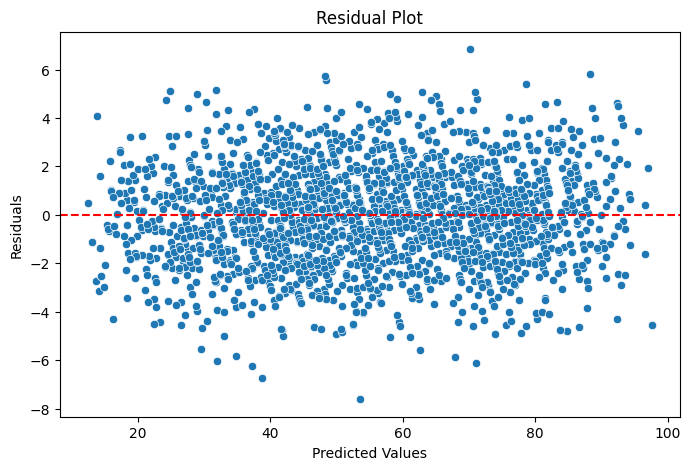

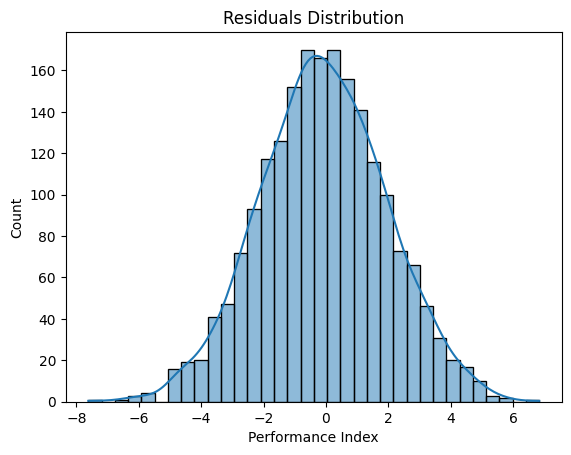

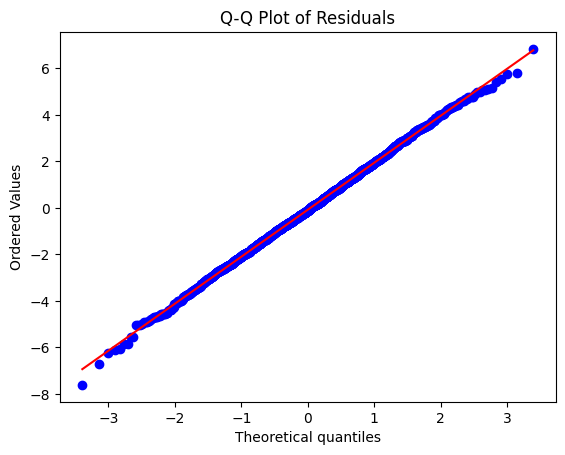

In [39]:
residuals = y_test_multi - y_pred_multi

# Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


5. Hyperparameter Tuning and Model Improvement


5.1 Ridge and Lasso Regression


In [40]:
#Ridge Regression
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_multi, y_train_multi)

print(f'Best alpha for Ridge: {ridge_cv.alpha_}')


Best alpha for Ridge: 10.0


In [41]:
#lasso regression
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000)
lasso_cv.fit(X_train_multi, y_train_multi)

print(f'Best alpha for Lasso: {lasso_cv.alpha_}')


Best alpha for Lasso: 0.3045954685000001


evaluation

In [42]:
y_pred_ridge = ridge_cv.predict(X_test_multi)
y_pred_lasso = lasso_cv.predict(X_test_multi)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test_multi, y_pred_ridge)))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test_multi, y_pred_lasso)))


Ridge RMSE: 2.020576651896296
Lasso RMSE: 2.06526653784933


5.2 Feature Importance (Lasso)

In [43]:
importance = pd.Series(lasso_cv.coef_, index=X_multi.columns)
top_features = importance.abs().sort_values(ascending=False).head(3).index.tolist()
print("Top 3 important features:", top_features)


Top 3 important features: ['Hours Studied', 'Previous Scores', 'Sleep Hours']


In [44]:
# retrainn withh top 3 features

In [45]:
X_top = df[top_features]
y_top = df['Performance Index']

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

model_top = LinearRegression()
model_top.fit(X_train_top, y_train_top)

y_pred_top = model_top.predict(X_test_top)

print("Top 3 Features Model RMSE:", np.sqrt(mean_squared_error(y_test_top, y_pred_top)))


Top 3 Features Model RMSE: 2.131925866305059
